In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing API to connect to NFL data sources like nflfastR, nfldata, dynastyprocess, and Draft Scout.
import nfl_data_py as nfl 

In [3]:
# bringing back in data frames ff_all and ff_collective

ff_all = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_position_pts.csv", index_col = 0,
                    low_memory = False)
ff_collective = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_collective_seasons.csv", index_col = 0)

In [4]:
# making all cols lower case

ff_all.columns = map(str.lower, ff_all.columns)
ff_collective.columns = map(str.lower, ff_collective.columns)


# FF Collective initial EDA, further cleaning, feature engineering

In [5]:
# take a look at sample of the data, make sure everything looks 

pd.set_option('display.max_columns', None)
ff_collective.sample(12)

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,y/a,y/r,totaltds_22,2pm,2pp,ppr,dkpt,fdpt,vbd,posrank,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,abbreviation
1761,SEA,Stephen Sullivan,TE,00-0036438,77.0,242.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks,459.0,356.0,5912.0,3941.0,1971.0,18.0,147.28,-89.48,371.0,6089.0,4560.0,1529.0,22.0,32.07,4.0,0.0,12.0,12.0,SEA
361,HOU,Lamar Miller,RB,00-0029615,70.0,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Houston Texans,378.0,346.0,5792.0,3783.0,2009.0,22.0,110.60,-128.18,385.0,6213.0,4276.0,1937.0,22.0,22.64,6.0,0.0,10.0,10.0,HOU
3459,WAS,Cole Turner,TE,00-0037078,78.0,240.0,0.0,WAS,TE,22.0,10.0,2.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,2.0,0.0,0.0,0.0,NaN,NaN,2022,0.0,NaN,11.5,0.0,NaN,NaN,4.3,4.3,3.3,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2657,WAS,DeAndre Carter,WR,00-0031763,68.0,190.0,6.0,WAS,WR,28.0,17.0,6.0,44.0,24.0,0.0,0.0,0.0,89.0,0.0,10.0,296.0,3.0,63.0,0.0,3.0,0.0,NaN,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DeAndre Carter,NaN,NaN,NaN,13.107633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-0031763,7.089533,3.351980,29.243285,3.200,6.2,52.666667,44.6,0.40,3.234833,3.524335,-0.289502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1524,MIA,Jakeem Grant,WR,00-0032791,67.0,169.0,4.0,MIA,WR,28.0,14.0,4.0,54.0,36.0,0.0,0.0,0.0,20.0,0.0,3.0,373.0,1.0,51.0,0.0,2.0,0.0,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jakeem Grant,NaN,NaN,NaN,11.255181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-0032791,6.773614,3.125088,19.213942,7.375,11.5,62.083333,77.0,0.25,6.649299,4.604801,2.044498

In [6]:
ff_collective.describe()

,height,weight,years_exp,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,season,cmp,y/a,y/r,totaltds_22,2pm,2pp,ppr,dkpt,fdpt,vbd,posrank,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,avg_cushion,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins
count,3294.000000,3468.000000,3133.000000,2436.000000,2436.000000,2436.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2243.000000,2435.000000,2435.000000,2435.000000,626.000000,3477.000000,602.000000,329.000000,458.000000,602.000000,51.000000,24.00000,544.000000,543.000000,543.000000,69.000000,602.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.000000,149.000000,247.000000,247.000000,1103.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,855.000000,856.000000,856.000000,856.000000,856.000000,856.000000,855.000000,856.000000,855.000000,855.000000,855.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000
mean,73.425622,217.430219,3.211299,26.158867,10.767241,5.024220,27.763860,18.651745,210.641068,1.325667,29.450103,98.114579,0.785626,22.394661,206.659138,1.292813,64.570860,0.671458,0.936756,0.431622,87.404153,2020.420765,19.084718,4.236657,10.315349,1.983389,1.078431,1.62500,79.849081,83.657274,70.541252,46.898551,90.054817,2.085542e+06,58.044966,12.008725,511.120805,55.426174,43.079866,6.914094,0.0,58.234899,-11.216779,2.759172,5.685378,9.409767,-2.224093,16.162191,39.458219,-1.012750,50.250024,350.866945,2.069315,1.213906,85.788282,31.991887,63.136304,64.722779,-1.586475,21.003781,47.296812,4.473698,22.708762,2.787491,23.838955,103.006074,97.294735,3.982169,4.239487,0.098263,0.382179,0.783523,6.039030,3.028439,23.950273,7.500049,11.728006,63.270577,90.430389,0.570206,4.456373,3.983055,0.473743,320.939404,283.749365,4792.704949,3192.947335,1599.757614,18.231916,57.401539,-56.814505,319.539340,4809.334708,3216.267766,1593.066942,18.451777,0.711193,6.835025,0.071066,6.816942,6.852475
std,2.881150,23.556890,3.165110,3.305494,5.323885,5.567269,36.106362,24.422859,805.679578,5.429489,110.529005,237.143759,2.109580,52.097208,299.121100,2.217268,77.138975,2.520513,1.975430,0.968138,55.546921,1.129862,70.662690,3.914599,5.394760,2.868683,0.271524,0.76967,86.167300,89.018201,79.482507,39.057704,62.691931,1.774138e+06,13.564149,23.385561,218.898437,32.430090,28.315023,9.608766,0.0,14.066209,5.565232,0.209149,1.394963,3.495746,0.984641,4.824913,5.440470,1.437435,17.287148,138.494267,1.272250,0.636320,16.381049,11.933716,5.617522,3.502920,4.921273,1.346977,4.953579,2.466471,13.680034,0.187011,10.069068

We should create some type of cutoff for amount of games played, and keep track of what our limitations will be


Text(0.5, 1.0, 'Distribution of games started')

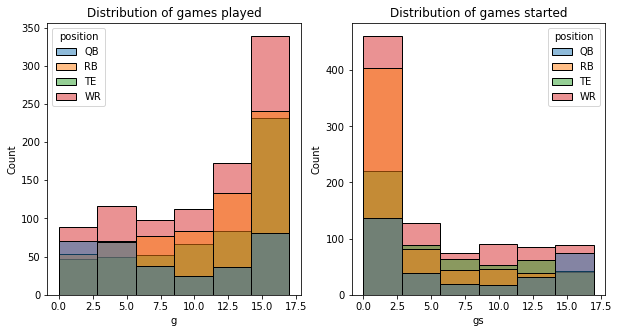

In [7]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

sns.histplot(data = ff_collective, x = 'g', ax = axes[0], hue = 'position', bins = 6)
axes[0].set_title('Distribution of games played')

sns.histplot(data = ff_collective, x = 'gs', ax = axes[1], hue = 'position', bins  = 6)
axes[1].set_title('Distribution of games started')


In [8]:
ff_collective['position'].value_counts()

WR    1372
RB     871
TE     744
QB     482
Name: position, dtype: int64

In [9]:
ff_collective[['g', 'gs']].quantile([.1, .2, .25])

,g,gs
0.10,2.0,0.0
0.20,5.0,0.0
0.25,6.0,0.0


It would makes sense to have a games played cutoff for all positons (20th percentile is 5 games played; is a good cut off to keep the top 80% of the league). many of the RBs, WRs and TEs play in a lot of games but don't start them -- the nature of the sport and the amount of players at each position.

Only for QBs should there be a cutoff for games started. 

Other ways to clean up data? 

In [10]:
### if players didn't record any FF stats, some of these columns would be null
# let's check

ff_collective[['tm', 'g', 'gs']].isna().sum()

tm    1041
g     1041
gs    1041
dtype: int64

In [11]:
# see a sample of data with nulls

ff_collective[ff_collective[['tm', 'g', 'gs']].isnull().any(axis = 1)].sample(10)

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,y/a,y/r,totaltds_22,2pm,2pp,ppr,dkpt,fdpt,vbd,posrank,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,abbreviation
1187,CLE,JoJo Natson,WR,00-0033266,67.0,153.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cleveland Browns,408.0,355.0,5913.0,3539.0,2374.0,16.0,140.35,-127.09,419.0,5735.0,3962.0,1773.0,21.0,-9.72,5.0,0.0,11.0,11.0,CLE
2460,NYG,Brian Lewerke,QB,00-0036092,75.0,212.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York Giants,258.0,299.0,4884.0,3196.0,1688.0,30.0,-100.13,-76.83,416.0,6032.0,3839.0,2193.0,22.0,19.17,13.0,0.0,4.0,4.0,NYG
711,NYG,Brittan Golden,WR,00-0029336,72.0,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York Giants,341.0,311.0,5416.0,3731.0,1685.0,33.0,-10.30,-104.11,451.0,6037.0,4225.0,1812.0,16.0,-0.37,12.0,0.0,4.0,4.0,NYG
1768,SEA,John Ursua,WR,00-0035597,69.0,182.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks,459.0,356.0,5912.0,3941.0,1971.0,18.0,147.28,-89.48,371.0,6089.0,4560.0,1529.0,22.0,32.07,4.0,0.0,12.0,12.0,SEA
1114,CAR,Omar Bayless,WR,00-0035947,73.0,207.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carolina Panthers,350.0,335.0,5592.0,3888.0,1704.0,21.0,

We will get rid of nulls here, as well

In [12]:
## checking fantasy data

ff_collective[['player_name', 'fantasypoints', 'season']].sample(5)

,player_name,fantasypoints,season
1463,Justin Jackson,46.00,2020
505,Mike Thomas,3.40,2019
728,Sam Darnold,183.16,2019
1449,Brycen Hopkins,NaN,2020
3366,Calvin Austin,NaN,2022


Text(0.5, 1.0, 'Boxplot Distribution of points scored by position')

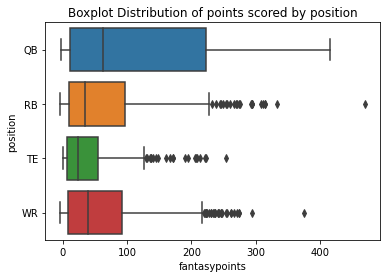

In [13]:
# let's visualize some data within this

ax = sns.boxplot(data = ff_collective, x = 'fantasypoints', y = 'position')

ax.set_title('Boxplot Distribution of points scored by position')


Text(0.5, 1.0, 'Boxplot Distribution of points scored by position')

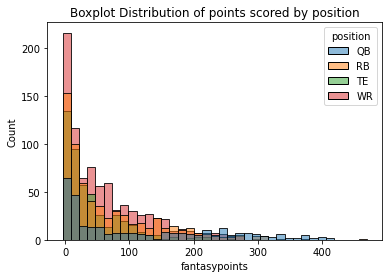

In [14]:
# let's visualize some data within this

ax = sns.histplot(data = ff_collective, x = 'fantasypoints', hue = 'position')

ax.set_title('Boxplot Distribution of points scored by position')

In [15]:
# let's check certain percentiles for fantasypoints distribution

ff_collective['fantasypoints'].quantile([.1, .2, .3, .4, .5, .55, .6])

0.10     2.000
0.20     5.000
0.30    11.600
0.40    20.000
0.50    34.600
0.55    42.000
0.60    51.224
Name: fantasypoints, dtype: float64

So, the bottom 10% of the league scores 2 or less points a season. The median is 34.6. let's see how this looks after filtering out for games played and other nulls 

In [16]:
## Filtering data 

## first, getting rid of those null columns of players without stats for a given year

ff_collective_sm = ff_collective.dropna(subset = ['tm', 'g', 'gs'])

## setting a filter for g 

ff_collective_sm = ff_collective_sm.loc[ff_collective['g'] >= 5]

Text(0.5, 1.0, 'Distribution of games started')

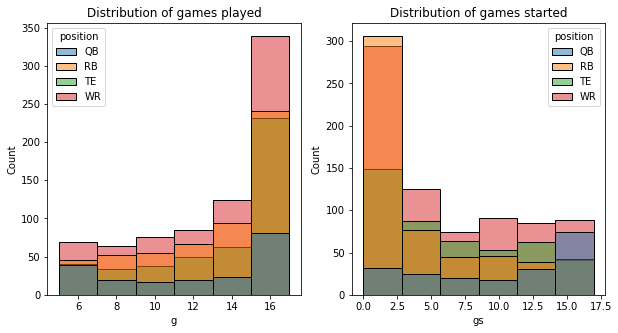

In [17]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

sns.histplot(data = ff_collective_sm, x = 'g', ax = axes[0], hue = 'position', bins = 6)
axes[0].set_title('Distribution of games played')

sns.histplot(data = ff_collective_sm, x = 'gs', ax = axes[1], hue = 'position', bins  = 6)
axes[1].set_title('Distribution of games started')

In [18]:
# let's re-check certain percentiles for fantasypoints distribution

ff_collective_sm['fantasypoints'].quantile([.1, .2, .3, .4, .5, .55, .6])

0.10     4.00
0.20    10.00
0.30    18.09
0.40    31.04
0.50    46.00
0.55    55.00
0.60    66.00
Name: fantasypoints, dtype: float64

The median here has increased, as predicted. We'll use this median as the cutoff for fantasy points in a season in this dataset (46 points).

Thus far, we've excluded players that didn't have any fantasy stats ('g', 'gs', 'tm' all null), players with >= 5 games played (20th percentile), and >= median of fantasy points for all players, as we want relevant players.

In [19]:
ff_collective_sm = ff_collective_sm.loc[ff_collective_sm['fantasypoints'] >= (ff_collective_sm['fantasypoints'].quantile(.5))]

Text(0.5, 1.0, 'Boxplot Distribution of points scored by position')

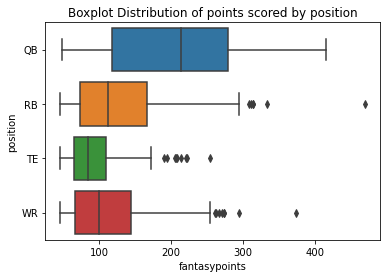

In [20]:
# let's revisualize some data within this

ax = sns.boxplot(data = ff_collective_sm, x = 'fantasypoints', y = 'position')

ax.set_title('Boxplot Distribution of points scored by position')

At this point, other cutoffs should be made at a position by position basis. 

### Further cleaning and feature engineering

In [21]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)

ff_nulls = ff_collective_sm.isna().sum()

print(ff_nulls)

team                                         4
player_name                                  4
position                                     4
player_id_x                                  4
height                                       4
weight                                       4
years_exp                                    5
tm                                           0
pos                                          0
age                                          0
g                                            0
gs                                           0
tgt                                          0
rec                                          0
passingyds                                   0
passingtd                                    0
passingatt                                   0
rushingyds                                   0
rushingtd                                    0
rushingatt                                   0
receivingyds                                 0
receivingtd  

what columns can we simply get rid of (Redundant info, but one has nulls, or one with nulls that we will derive later on, like avg_rush_yards or yards per target)

rush_yards, rush_attempts, avg_rush_yards, rush_touchdowns, targets, receptions, yards, rec_touchdowns, y/a, y/r, completions, completion_percentage, 2pm, 2pp, posrank, totaltds_22

In [22]:
# cols to drop

cols_drop = ['rush_yards', 'rush_attempts', 'avg_rush_yards', 
             'rush_touchdowns', 'targets', 'receptions', 'yards', 
             'rec_touchdowns', 'y/a', 'y/r', 'completions', 'completion_percentage',
            '2pm', '2pp', 'posrank', 'totaltds_22']

ff_collective_sm.drop(cols_drop, axis = 1, inplace = True)

In [84]:
ff_collective_sm.tm.value_counts()

BAL    36
SFO    33
PHI    33
KAN    32
CIN    32
DAL    32
LAR    31
DET    31
LAC    31
NYJ    31
MIA    31
WAS    31
TEN    31
NWE    30
SEA    30
HOU    30
IND    30
TAM    30
NOR    30
BUF    29
PIT    28
ARI    28
GNB    28
CLE    28
CHI    27
DEN    26
ATL    26
MIN    25
JAX    25
NYG    24
2TM    24
CAR    21
LVR    20
OAK     8
3TM     1
Name: tm, dtype: int64

In [88]:
# 2022 teams have limited data for team wins. need to add that

wins_22 = {'ARI': 4, 'ATL': 7, 'BAL': 10, 'BUF': 13, 'CAR': 7, 'CHI': 3, 'CIN': 12, 'CLE': 7,
           'DAL': 12, 'DEN': 5, 'DET': 9, 'GNB': 8, 'HOU': 3, 'IND': 4, 'JAX': 9, 'LVR': 6,
           'LAC': 10, 'LAR': 5, 'MIA': 9, 'MIN': 13, 'NWE': 8, 'NOR': 7, 'NYG': 9, 'NYJ': 7,
           'PHI': 14, 'PIT': 9, 'SFO': 13, 'SEA': 9, 'TAM': 8, 'TEN': 7, 'WAS': 8}

ff_collective_sm.loc[ff_collective_sm['season'] == 2022, 'team_wins'] = ff_collective_sm['tm'].map(wins_22)

In [89]:
ff_collective_sm.loc[ff_collective_sm['season'] == 2022]['team_wins']

2669     4.0
2673     4.0
2678     4.0
2685     4.0
2690     4.0
2692     4.0
2695     4.0
2696     7.0
2699     7.0
2703     7.0
2709     7.0
2715     7.0
2717     7.0
2723    10.0
2724    10.0
2726    10.0
2728    10.0
2730    10.0
2733    10.0
2737    10.0
2740    10.0
2743    10.0
2752    13.0
2755     NaN
2756    13.0
2758    13.0
2759    13.0
2766    13.0
2768    13.0
2775     7.0
2778     7.0
2779     7.0
2789     7.0
2799     3.0
2800     3.0
2803     3.0
2807     3.0
2810     3.0
2816     NaN
2817     3.0
2820     8.0
2824     8.0
2827     8.0
2831     8.0
2833     8.0
2834     8.0
2836     8.0
2837     8.0
2844    12.0
2845    12.0
2846    12.0
2850    12.0
2856    12.0
2858    12.0
2861    12.0
2862    12.0
2864     7.0
2865     7.0
2867     7.0
2868     7.0
2874     7.0
2879     7.0
2881     7.0
2890    12.0
2891    12.0
2893    12.0
2894    12.0
2898    12.0
2904    12.0
2905    12.0
2907    12.0
2914     5.0
2917     NaN
2919     NaN
2930     5.0
2933     5.0
2934     5.0

# running calculations on the data frame

# setting up as a list of tuples

# calculations = [
    ('pct_gs', 'gs', 'g', lambda x, y: x / y),
    ('avg_per_rush', 'rushingyds', 'rushingatt', lambda x, y: x / y),
    ('avg_per_catch', 'receivingyds', 'rec', lambda x, y: x / y),
    ('avg_per_tgt', 'receivingyds', 'tgt', lambda x, y: x / y),
    ('std_fp', 'passingyds', 'rushingyds', 'receivingyds', 'rushingtd', 'passingtd', 'receivingtd', 'rec', 'int', 'fumbleslost',
     lambda x, y=None, z=None, a=None, b=None, c=None, d=None, e=None, f=None: x * 0.04 + (y+z)*0.1 + (a + c)*6 + (b or 0) * 5 + (d or 0) * 0.5 + (e + f)*2),
    ('ttl_touch', 'rushingatt', 'rec', lambda x, y: x + y),
    ('ttl_opp', 'rushingatt', 'tgt', 'passingatt', lambda x, y, z=None, a=None: x + y + (z or 0) + (a or 0)),
    ('ttl_opp_per_game', 'ttl_opp', 'g', lambda x, y: x / y),
    ('yds_per_opp', 'receivingyds', 'rushingyds', 'passingyds', 'ttl_opp', lambda x, y, z, a: (x + y + z) / a),
    ('td_per_opp', 'receivingtd', 'rushingtd', 'passingtd', 'ttl_opp', lambda x, y, z, a: (x + y + z) / a),
    ('turnover_per_opp', 'int', 'fumbles', 'ttl_opp', lambda x, y, z, a: (x + y) / a),
    ('fp_per_opp', 'fantasypoints', 'ttl_opp', lambda x, y: x / y),
    ('fp_per_gm', 'fantasypoints', 'g', lambda x, y: x / y)
]

# for calc in calculations:
    # column_name, *columns, operation = calc
    # ff_collective_sm[column_name] = operation(*[ff_collective_sm[col] for col in columns])

# Display the updated DataFrame
# print(ff_collective_sm)

In [90]:
# running similar code as above to create new columns

# percentage of games started
ff_collective_sm['pct_gs'] = ff_collective_sm['gs'] / ff_collective_sm['g'] 

ff_collective_sm['avg_per_rush'] = ff_collective_sm['rushingyds'] / ff_collective_sm['rushingatt']

ff_collective_sm['avg_per_catch'] = ff_collective_sm['receivingyds'] / ff_collective_sm['rec']

ff_collective_sm['avg_per_tgt'] = ff_collective_sm['receivingyds'] / ff_collective_sm['tgt']

ff_collective_sm['ttl_touch'] = ff_collective_sm['rushingatt'] + ff_collective_sm['rec']

ff_collective_sm['ttl_opp'] = ff_collective_sm['rushingatt'] + ff_collective_sm['tgt'] + ff_collective_sm['passingatt']

ff_collective_sm['ttl_turnover'] = ff_collective_sm['int'] + ff_collective_sm['fumbleslost']

ff_collective_sm['ttl_opp_per_game'] = ff_collective_sm['ttl_opp'] / ff_collective_sm['g']

ff_collective_sm['yds_per_opp'] = (ff_collective_sm['receivingyds'] + ff_collective_sm['rushingyds'] + ff_collective_sm['passingyds']) / ff_collective_sm['ttl_opp']

ff_collective_sm['td_per_opp'] = (ff_collective_sm['receivingtd'] + ff_collective_sm['rushingtd'] + ff_collective_sm['passingtd']) / ff_collective_sm['ttl_opp']

ff_collective_sm['turnover_per_opp'] = ff_collective_sm['ttl_turnover'] / ff_collective_sm['ttl_opp']

ff_collective_sm['fp_per_opp'] = ff_collective_sm['fantasypoints'] / ff_collective_sm['ttl_opp']

ff_collective_sm['fp_per_gm'] = ff_collective_sm['fantasypoints'] / ff_collective_sm['g']

# If rookie year
ff_collective_sm['rookie'] = np.where(ff_collective_sm['years_exp'] == 0, 1, 0)

ff_collective_sm['scrimyds'] = ff_collective_sm['rushingyds'] + ff_collective_sm['receivingyds']
ff_collective_sm['non_pass_tds'] = ff_collective_sm['rushingtd']  + ff_collective_sm['receivingtd']

# getting standard fantasy points
ff_collective_sm['std_fp'] = ff_collective_sm['passingyds'] * 0.04 + ff_collective_sm['scrimyds'] * 0.1 + \
                          ff_collective_sm['passingtd'] * 4 + ff_collective_sm['non_pass_tds'] * 6 + \
                          (ff_collective_sm['ttl_turnover'] * -2)

# creating another with 5 pt passing tds
ff_collective_sm['std_fp_5ptd'] = ff_collective_sm['std_fp'] + ff_collective_sm['passingtd']


ff_collective_sm['hppr_fp'] = ff_collective_sm['std_fp'] + (0.5 * ff_collective_sm['rec'])
ff_collective_sm['hppr_fp_5ptd'] = ff_collective_sm['std_fp_5ptd'] + (0.5 * ff_collective_sm['rec'])

# writing short function for te_premium points
def te_prem(row):
    if row['position'] == 'TE':
        return row['std_fp'] + (1 * row['rec'])
    else:
        return row['std_fp'] + (0.5 * row['rec'])
                                
ff_collective_sm['te_prem_pts'] = ff_collective_sm.apply(lambda row: te_prem(row), axis=1)
ff_collective_sm['te_prem_pts_p5td'] = ff_collective_sm['te_prem_pts']  + ff_collective_sm['passingtd']

ff_collective_sm['hppr_pts_pg_5ptd'] = ff_collective_sm['hppr_fp_5ptd'] / ff_collective_sm['g']

ff_collective_sm['te_prem_pts_pg_5ptd'] = ff_collective_sm['te_prem_pts_p5td'] / ff_collective_sm['g']

ff_collective_sm.sample(5)

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,abbreviation,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank,ff_level
480,KC,Demarcus Robinson,WR,00-0032775,73.0,203.0,3.0,KAN,WR,25.0,16.0,10.0,55.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,449.0,4.0,100.9,0.0,0.0,0.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Demarcus Robinson,NaN,NaN,NaN,14.002719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-0032775,5.33534,3.018503,20.98184,65.43771,4.305052,4.205338,0.099714,Kansas City Chiefs,451.0,350.0,6067.0,4498.0,1569.0,15.0,186.59,-40.12,308.0,5594.0,3543.0,2051.0,23.0,2.64,4.0,0.0,12.0,12.0,KC,0.625000,NaN,14.031250,8.163636,32.0,55.0,0.0,3.437500,8.163636,0.072727,0.000000,1.834545,6.306250,0,449.0,4.0,68.90,68.90,84.90,84.90,84.90,84.90,5.306250,5.306250,68.0,Non-starter
2411,NE,Rhamondre Stevenson,RB,00-0036875,72.0,246.0,0.0,NWE,RB,23.0,12.0,2.0,18.0,14.0,0.0,0.0,0.0,606.0,5.0,133.0,123.0,0.0,101.0,0.0,2.0,1.0,142.0,Rhamondre Stevenson,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rhamondre Stevenson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.838662,38.513970,2.746166,120.259384,14.490616,0.292262,0.437959,00-0036875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New England Patriots,462.0,362.0,6008.0,3857.0,2151.0,23.0,117.44,35.53,303.0,5284.0,3181.0,2103.0,30.0,7.93,7.0,0.0,10.0,10.0,NE,0.166667,4.556391,8.785714,6.833333,147.0,151.0,1.0,12.583333,4.827815,0.033113,0.006623,0.668874,8.416667,1,729.0,5.0,100.90,100.90,107.90,107.90,107.90,107.90,8.991667,8.991667,39.0,Non-starter
3398,SF,Brock Purdy,QB,00-0037834,73.0,212.0,0.0,SFO,QB,23.0,9.0,5.0,0.0,0.0,1374.0,13.0,170.0,13.0,1.0,22.0,0.0,0.0,106.0,4.0,0.0,0.0,NaN,NaN,2022,114.0,106.3,113.3,110.3,NaN,SF,4361741.0,65.6,12.0,211.0,28.6,26.2,0.6,0.0,69.1,-5.2,Brock Purdy,Brock Purdy,00-0037834,2.825069,5.852023,6.569671,-0.717648,8.897217,36.857035,-2.309159,47.285714,383.142857,3.714286,1.000000,114.055491,69.562346,-0.670854,19.301052,38.659066,00-0037834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco 49ers,108.0,90.0,1695.0,1001.0,694.0,6.0,14.83,46.88,61.0,1246.0,889.0,357.0,7.0,-24.26,2.0,0.0,3.0,13.0,SF,0.555556,0.590909,NaN,NaN,22.0,192.0,4.0,21.333333,7.223958,0.072917,0.020833,0.552083,11.777778,1,13.0,1.0,106.26,119.26,106.26,119.26,106.26,119.26,13.251111,13.251111,32.0,3
466,KC,Damien Williams,RB,00-0030874,71.0,224.0,5.0,KAN,RB,27.0,11.0,6.0,37.0,30.0,0.0,0.0,0.0,498.0,5.0,111.0,213.0,2.0,141.1,0.0,1.0,1.0,27.0,Damien Williams,2019,Na

In [25]:
# fantasypoints are ppr points with standard qb scoring (4 pts per td pass)

ff_collective_sm[['position', 'rec', 'passingtd', 'fantasypoints', 'std_fp', 'hppr_fp', 'te_prem_pts']].sample(5)

,position,rec,passingtd,fantasypoints,std_fp,hppr_fp,te_prem_pts
3466,WR,77.0,0.0,152.0,152.00,190.50,190.50
3325,QB,0.0,22.0,378.0,374.04,374.04,374.04
2726,RB,17.0,0.0,87.0,87.10,95.60,95.60
2350,RB,49.0,0.0,125.0,124.60,149.10,149.10
2993,QB,0.0,17.0,182.0,179.52,179.52,179.52


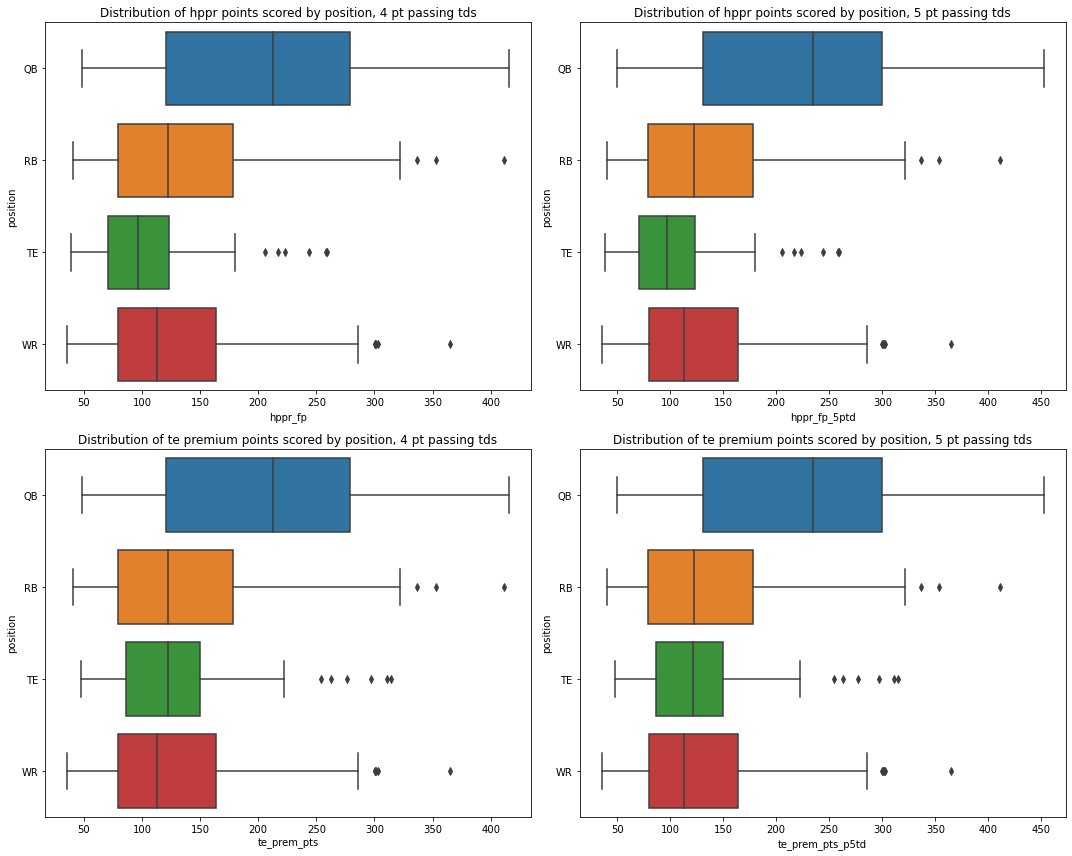

In [26]:
# let's see how TE premium would change

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,12))

sns.boxplot(data = ff_collective_sm, x = 'hppr_fp', ax = axes[0, 0], y = 'position')
axes[0, 0].set_title('Distribution of hppr points scored by position, 4 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts', ax = axes[1, 0], y = 'position')
axes[1, 0].set_title('Distribution of te premium points scored by position, 4 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[0, 1], y = 'position')
axes[0, 1].set_title('Distribution of hppr points scored by position, 5 pt passing tds')
axes[0, 1].set_xticks(range(50, 500, 50))

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1, 1], y = 'position')
axes[1, 1].set_title('Distribution of te premium points scored by position, 5 pt passing tds')
axes[1, 1].set_xticks(range(50, 500, 50))

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Distribution of te premium points per game scored by position, 5 pt passing tds')

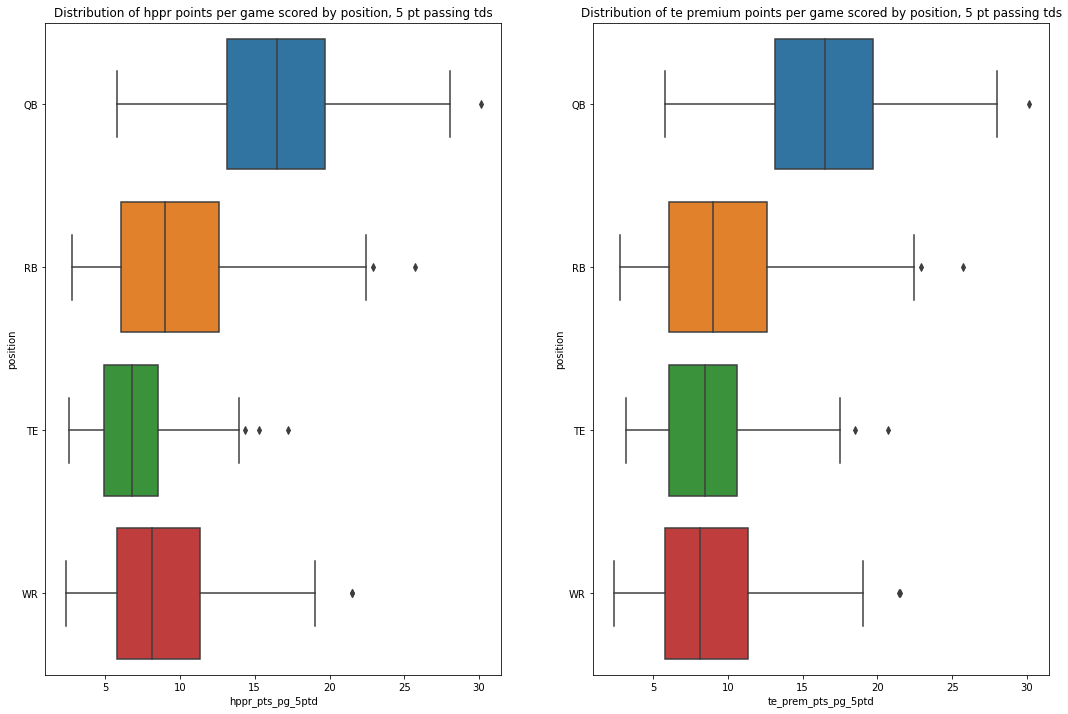

In [27]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,12))

sns.boxplot(data = ff_collective_sm, x = 'hppr_pts_pg_5ptd', ax = axes[0], y = 'position')
axes[0].set_title('Distribution of hppr points per game scored by position, 5 pt passing tds')

sns.boxplot(data = ff_collective_sm, x = 'te_prem_pts_pg_5ptd', ax = axes[1], y = 'position')
axes[1].set_title('Distribution of te premium points per game scored by position, 5 pt passing tds')


Text(0.5, 1.0, 'Distribution of games started')

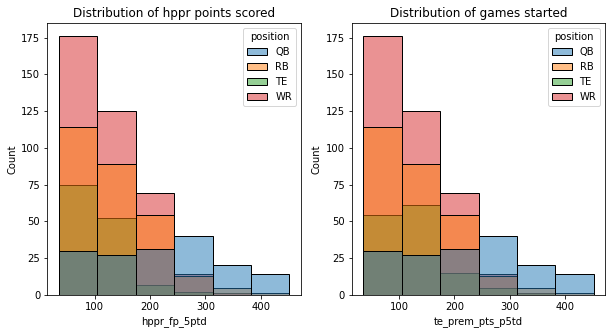

In [28]:
# let's visualize some data within this

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

sns.histplot(data = ff_collective_sm, x = 'hppr_fp_5ptd', ax = axes[0], hue = 'position', bins = 6)
axes[0].set_title('Distribution of hppr points scored')

sns.histplot(data = ff_collective_sm, x = 'te_prem_pts_p5td', ax = axes[1], hue = 'position', bins  = 6)
axes[1].set_title('Distribution of games started')

### ranking each in the season
Can we take the top 12 - 36 at each position?

In [91]:
# first, we'll sort these by position, season, and pts scored

ff_sorted = ff_collective_sm.sort_values(['position', 'season', 'hppr_fp_5ptd'], ascending = [True, True, False])

ff_sorted.head()

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,abbreviation,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank,ff_level
58,BAL,Lamar Jackson,QB,00-0034796,74.0,212.0,1.0,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,6.0,9.0,2.0,98.0,Lamar Jackson,2019,NaN,NaN,NaN,NaN,NaN,BAL,3916387.0,83.0,66.7,613.0,103.7,55.0,39.1,0.0,82.3,-7.4,Lamar Jackson,Lamar Jackson,00-0034796,2.943613,6.721439,8.814669,-2.093231,14.902159,38.032465,0.242468,50.125000,390.875000,4.500000,0.750000,108.768952,65.024081,2.274603,20.755909,47.606387,00-0034796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baltimore Ravens,531.0,386.0,6521.0,3225.0,3296.0,15.0,244.10,32.06,282.0,4809.0,3315.0,1494.0,25.0,-15.42,2.0,0.0,14.0,14.0,BAL,1.0,6.852273,NaN,NaN,176.0,577.0,8.0,38.466667,7.509532,0.074523,0.013865,0.720416,27.712000,0,1206.0,7.0,415.68,451.68,415.68,451.68,415.68,451.68,30.112000,30.112000,1.0,1
228,DAL,Dak Prescott,QB,00-0033077,74.0,238.0,3.0,DAL,QB,26.0,16.0,16.0,0.0,0.0,4902.0,30.0,596.0,277.0,3.0,52.0,0.0,0.0,335.78,11.0,6.0,2.0,131.0,Dak Prescott,2019,NaN,NaN,NaN,NaN,NaN,DAL,2577417.0,71.9,48.1,690.0,93.1,70.7,10.0,0.0,72.8,-9.7,Dak Prescott,Dak Prescott,00-0033077,2.863889,7.383088,9.074466,-1.691378,17.214539,41.775767,0.210847,70.117647,576.705882,3.529412,1.294118,100.884018,63.199449,2.774790,21.938140,52.216855,00-0033077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dallas Cowboys,434.0,379.0,6904.0,4751.0,2153.0,18.0,210.77,-31.81,321.0,5232.0,3576.0,1656.0,17.0,-65.31,8.0,0.0,8.0,8.0,DAL,1.0,5.326923,NaN,NaN,52.0,648.0,13.0,40.500000,7.992284,0.050926,0.020062,0.518179,20.986250,0,277.0,3.0,335.78,365.78,335.78,365.78,335.78,365.78,22.861250,22.861250,2.0,1
859,SEA,Russell Wilson,QB,00-0029263,71.0,215.0,7.0,SEA,QB,31.0,16.0,16.0,0.0,0.0,4110.0,31.0,516.0,342.0,3.0,75.0,0.0,0.0,326.60,5.0,8.0,2.0,93.0,Russell Wilson,2019,NaN,NaN,NaN,NaN,NaN,SEA,14881.0,71.5,43.0,674.0,90.9,58.3,10.6,0.0,71.2,-20.6,Russell Wilson,Russell Wilson,00-0029263,2.857214,6.919418,9.558971,-2.639553,19.070277,43.704954,0.181699,60.470588,481.411765,3.647059,0.588235,107.783697,61.297215,5.329405,22.970712,48.710589,00-0029263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks,405.0,341.0,5991.0,3791.0,2200.0,20.0,60.43,-66.35,398.0,6106.0,4223.0,1883.0,32.0,33.07,5.0,0.0,11.0,11.0,SEA,1.0,4.560000,NaN,NaN,75.0,591.0,7.0,36.937500,7.532995,0.057530,0.011844,0.552623,20.412500,0,342.0,3.0,326.60,357.60,326.60,357.60,326.60,357.60,22.350000,22.350000,3.0,1
357,HOU,Deshaun Watson,Q

In [92]:
# grouping by posiiton and season
# getting rank for these

ff_grouped = ff_sorted.groupby(['position', 'season'])

# adding rank column to collective
ff_collective_sm['season_position_rank'] = ff_grouped['hppr_fp_5ptd'].rank(ascending = False)

ff_collective_sm.sample(5)

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,abbreviation,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank,ff_level
3341,PHI,DeVonta Smith,WR,00-0036912,72.0,165.0,1.0,PHI,WR,24.0,17.0,17.0,136.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,1196.0,7.0,160.00,0.0,1.0,1.0,85.0,DeVonta Smith,2022,0.0,254.6,258.6,207.1,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DeVonta Smith,NaN,NaN,NaN,9.743894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-0036912,6.619075,2.913043,32.811817,72.462483,5.457070,4.987962,0.469108,Philadelphia Eagles,135.0,122.0,2099.0,1299.0,800.0,2.0,55.51,9.21,88.0,1472.0,947.0,525.0,11.0,-13.88,0.0,0.0,5.0,14.0,PHI,1.000000,NaN,12.589474,8.794118,95.0,136.0,1.0,8.000000,8.794118,0.051471,0.007353,1.176471,9.411765,0,1196.0,7.0,159.60,159.60,207.10,207.10,207.10,207.10,12.182353,12.182353,9.0,1
564,LV,Foster Moreau,TE,00-0034981,76.0,250.0,0.0,OAK,TE,22.0,13.0,7.0,25.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,5.0,68.40,0.0,0.0,0.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.538462,NaN,8.285714,6.960000,21.0,25.0,0.0,1.923077,6.960000,0.200000,0.000000,2.736000,5.261538,1,174.0,5.0,47.40,47.40,57.90,57.90,68.40,68.40,4.453846,5.261538,37.0,Non-starter
1,ARI,Kyler Murray,QB,00-0035228,70.0,207.0,0.0,ARI,QB,22.0,16.0,16.0,0.0,0.0,3722.0,20.0,542.0,544.0,4.0,93.0,0.0,0.0,279.28,12.0,5.0,2.0,114.0,Kyler Murray,2019,NaN,NaN,NaN,NaN,NaN,ARI,3917315.0,57.7,16.2,709.0,71.6,37.3,13.4,0.0,58.0,-17.8,Kyler Murray,Kyler Murray,00-0035228,2.733681,4.914236,6.850385,-1.936149,13.732432,38.64734,-2.111357,63.764706,437.882353,2.352941,1.411765,88.714455,66.836301,-1.817664,20.623331,45.849949,00-0035228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,361.0,314.0,5467.0,3477.0,1990.0,18.0,64.36,-173.55,442.0,6432.0,4510.0,1922.0,17.0,19.85,10.0,1.0,5.0,5.5,ARI,1.000000,5.849462,NaN,NaN,93.0,635.0,14.0,39.687500,6.718110,0.037795,0.022047,0.439811,17.455000,1,544.0,4.0,279.28,299.28,279.28,299.28,279.28,299.28,18.705000,18.705000,8.0,1
3008,HOU,Chris Moore,WR,00-0032398,73.0,200.0,6.0,HOU,WR,29.0,16.0,7.0,74.0,48.0,0.0,0.0,0.0,3.0,0.0,3.0,548.0,2.0,67.00,0.0,0.0,0.0,NaN,NaN,2022,0.0,115.1,118.1,91.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chris Moore,NaN,NaN,NaN,10.182815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [93]:
# creating a column to display 'level' of fantasy 
# ie qb1, rb1, wr1, etc. would be the top 12 at each position
# qb2 would be next 13-24, etc
def ff_rank_bucket(rank):
    if rank >= 1 and rank <= 12:
        return 1
    elif rank >=13 and rank <= 24:
        return 2
    elif rank >=25 and rank <=36:
        return 3
    else:
        return 'Non-starter'


ff_collective_sm['ff_level'] = ff_collective_sm['season_position_rank'].apply(ff_rank_bucket)

In [94]:
# we want top 12 QBs, top 24 RBs, top 36 WRs, top 12 TEs

starter_cts = {'QB': 12, 'RB': 24, 'WR': 36, 'TE': 12}

# creating an empty df to store the top rows

starter_df = pd.DataFrame()

# iterating over each category
for pos, ct in starter_cts.items():
    # selecting top rows for each
    top_rows = ff_sorted[ff_sorted['position'] == pos].groupby('season').head(ct)
    
    # appending to starter_df
    starter_df = pd.concat([starter_df, top_rows])
    
# reset index
starter_df = starter_df.reset_index(drop = True)

starter_df.head(5)

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,abbreviation,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank,ff_level
0,BAL,Lamar Jackson,QB,00-0034796,74.0,212.0,1.0,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,6.0,9.0,2.0,98.0,Lamar Jackson,2019,NaN,NaN,NaN,NaN,NaN,BAL,3916387.0,83.0,66.7,613.0,103.7,55.0,39.1,0.0,82.3,-7.4,Lamar Jackson,Lamar Jackson,00-0034796,2.943613,6.721439,8.814669,-2.093231,14.902159,38.032465,0.242468,50.125000,390.875000,4.500000,0.750000,108.768952,65.024081,2.274603,20.755909,47.606387,00-0034796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baltimore Ravens,531.0,386.0,6521.0,3225.0,3296.0,15.0,244.10,32.06,282.0,4809.0,3315.0,1494.0,25.0,-15.42,2.0,0.0,14.0,14.0,BAL,1.0,6.852273,NaN,NaN,176.0,577.0,8.0,38.466667,7.509532,0.074523,0.013865,0.720416,27.712000,0,1206.0,7.0,415.68,451.68,415.68,451.68,415.68,451.68,30.112000,30.112000,1.0,1
1,DAL,Dak Prescott,QB,00-0033077,74.0,238.0,3.0,DAL,QB,26.0,16.0,16.0,0.0,0.0,4902.0,30.0,596.0,277.0,3.0,52.0,0.0,0.0,335.78,11.0,6.0,2.0,131.0,Dak Prescott,2019,NaN,NaN,NaN,NaN,NaN,DAL,2577417.0,71.9,48.1,690.0,93.1,70.7,10.0,0.0,72.8,-9.7,Dak Prescott,Dak Prescott,00-0033077,2.863889,7.383088,9.074466,-1.691378,17.214539,41.775767,0.210847,70.117647,576.705882,3.529412,1.294118,100.884018,63.199449,2.774790,21.938140,52.216855,00-0033077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dallas Cowboys,434.0,379.0,6904.0,4751.0,2153.0,18.0,210.77,-31.81,321.0,5232.0,3576.0,1656.0,17.0,-65.31,8.0,0.0,8.0,8.0,DAL,1.0,5.326923,NaN,NaN,52.0,648.0,13.0,40.500000,7.992284,0.050926,0.020062,0.518179,20.986250,0,277.0,3.0,335.78,365.78,335.78,365.78,335.78,365.78,22.861250,22.861250,2.0,1
2,SEA,Russell Wilson,QB,00-0029263,71.0,215.0,7.0,SEA,QB,31.0,16.0,16.0,0.0,0.0,4110.0,31.0,516.0,342.0,3.0,75.0,0.0,0.0,326.60,5.0,8.0,2.0,93.0,Russell Wilson,2019,NaN,NaN,NaN,NaN,NaN,SEA,14881.0,71.5,43.0,674.0,90.9,58.3,10.6,0.0,71.2,-20.6,Russell Wilson,Russell Wilson,00-0029263,2.857214,6.919418,9.558971,-2.639553,19.070277,43.704954,0.181699,60.470588,481.411765,3.647059,0.588235,107.783697,61.297215,5.329405,22.970712,48.710589,00-0029263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks,405.0,341.0,5991.0,3791.0,2200.0,20.0,60.43,-66.35,398.0,6106.0,4223.0,1883.0,32.0,33.07,5.0,0.0,11.0,11.0,SEA,1.0,4.560000,NaN,NaN,75.0,591.0,7.0,36.937500,7.532995,0.057530,0.011844,0.552623,20.412500,0,342.0,3.0,326.60,357.60,326.60,357.60,326.60,357.60,22.350000,22.350000,3.0,1
3,HOU,Deshaun Watson,QB,00-00

### let's see similar graphs as above but just with starters

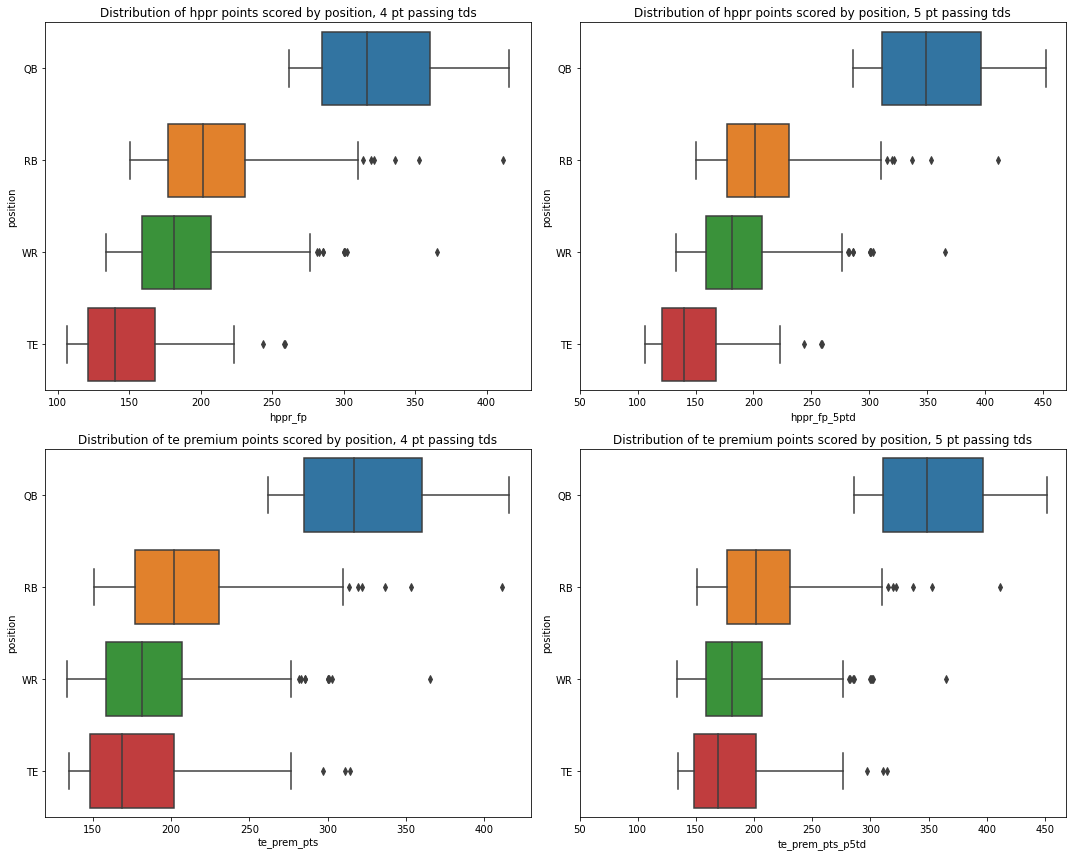

In [95]:
# let's see how TE premium would change

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,12))

sns.boxplot(data = starter_df, x = 'hppr_fp', ax = axes[0, 0], y = 'position')
axes[0, 0].set_title('Distribution of hppr points scored by position, 4 pt passing tds')

sns.boxplot(data = starter_df, x = 'te_prem_pts', ax = axes[1, 0], y = 'position')
axes[1, 0].set_title('Distribution of te premium points scored by position, 4 pt passing tds')

sns.boxplot(data = starter_df, x = 'hppr_fp_5ptd', ax = axes[0, 1], y = 'position')
axes[0, 1].set_title('Distribution of hppr points scored by position, 5 pt passing tds')
axes[0, 1].set_xticks(range(50, 500, 50))

sns.boxplot(data = starter_df, x = 'te_prem_pts_p5td', ax = axes[1, 1], y = 'position')
axes[1, 1].set_title('Distribution of te premium points scored by position, 5 pt passing tds')
axes[1, 1].set_xticks(range(50, 500, 50))

plt.tight_layout()

plt.show()

<AxesSubplot:xlabel='team_wins', ylabel='te_prem_pts_p5td'>

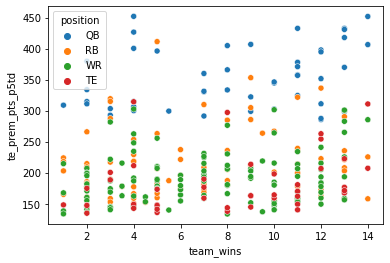

In [34]:
sns.scatterplot(data = starter_df, x = 'team_wins', y = 'te_prem_pts_p5td', hue = 'position')

<AxesSubplot:xlabel='age', ylabel='te_prem_pts_p5td'>

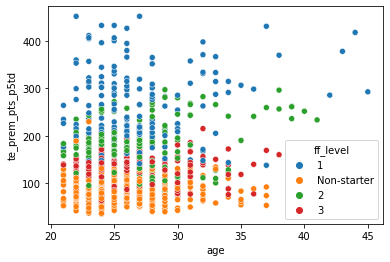

In [35]:
sns.scatterplot(data = ff_collective_sm, x = 'age', y = 'te_prem_pts_p5td', hue = 'ff_level')

TEs floors definitely increase, as do QBs wtih 5 pt passing tds; qbs go into almost a league of their own. similar to QBs in real nfl

In [96]:
### Seperating by position

# creating separate ff

ff_rb_t = ff_collective_sm.loc[ff_collective_sm['position'] == 'RB']
ff_wr_t = ff_collective_sm.loc[ff_collective_sm['position'] == 'WR']
ff_qb_t = ff_collective_sm.loc[ff_collective_sm['position'] == 'QB']
ff_te_t = ff_collective_sm.loc[ff_collective_sm['position'] == 'TE']

# dropping columns that are only nulls for certain positions, like passing stats for RBs

ff_rb_t = ff_rb_t.dropna(how = 'all', axis = 1)
ff_qb_t = ff_qb_t.dropna(how = 'all', axis = 1)
ff_wr_t = ff_wr_t.dropna(how = 'all', axis = 1)
ff_te_t = ff_te_t.dropna(how = 'all', axis = 1)

In [97]:
### Seperating by position

# creating separate ff

ff_rb_starter = starter_df.loc[starter_df['position'] == 'RB']
ff_wr_starter = starter_df.loc[starter_df['position'] == 'WR']
ff_qb_starter = starter_df.loc[starter_df['position'] == 'QB']
ff_te_starter = starter_df.loc[starter_df['position'] == 'TE']

# dropping columns that are only nulls for certain positions, like passing stats for RBs

ff_rb_starter = ff_rb_starter.dropna(how = 'all', axis = 1)
ff_qb_starter = ff_qb_starter.dropna(how = 'all', axis = 1)
ff_wr_starter = ff_wr_starter.dropna(how = 'all', axis = 1)
ff_te_starter = ff_te_starter.dropna(how = 'all', axis = 1)

In [98]:
ff_rb_t.head()

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,player_display_name,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,team,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,abbreviation,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank,ff_level
4,ARI,David Johnson,RB,00-0032187,73.0,224.0,4.0,ARI,RB,28.0,13.0,9.0,47.0,36.0,0.0,0.0,0.0,345.0,2.0,94.0,370.0,4.0,141.5,0.0,1.0,1.0,5.0,David Johnson,2019,NaN,NaN,NaN,NaN,NaN,David Johnson,4.014747,7.957232,2.842629,123.646390,-19.479724,-0.662145,0.280077,00-0032187,Arizona Cardinals,361.0,314.0,5467.0,3477.0,1990.0,18.0,64.36,-173.55,442.0,6432.0,4510.0,1922.0,17.0,19.85,10.0,1.0,5.0,5.5,ARI,0.692308,3.670213,10.277778,7.872340,130.0,141.0,1.0,10.846154,5.070922,0.042553,0.007092,1.003546,10.884615,0,715.0,6.0,105.5,105.5,123.5,123.5,123.5,123.5,9.500000,9.500000,38.0,Non-starter
5,ARI,Kenyan Drake,RB,00-0033118,73.0,211.0,3.0,2TM,RB,25.0,14.0,10.0,68.0,50.0,0.0,0.0,0.0,817.0,8.0,170.0,345.0,0.0,212.2,0.0,2.0,1.0,89.0,Kenyan Drake,2019,NaN,NaN,NaN,NaN,NaN,Kenyan Drake,4.013463,8.832442,2.889761,127.815758,7.638788,0.087014,0.359617,00-0033118,Arizona Cardinals,361.0,314.0,5467.0,3477.0,1990.0,18.0,64.36,-173.55,442.0,6432.0,4510.0,1922.0,17.0,19.85,10.0,1.0,5.0,5.5,ARI,0.714286,4.805882,6.900000,5.073529,220.0,238.0,1.0,17.000000,4.882353,0.033613,0.004202,0.891597,15.157143,0,1162.0,8.0,162.2,162.2,187.2,187.2,187.2,187.2,13.371429,13.371429,16.0,2
8,ARI,Chase Edmonds,RB,00-0034681,69.0,210.0,1.0,ARI,RB,23.0,13.0,2.0,21.0,12.0,0.0,0.0,0.0,303.0,4.0,60.0,105.0,1.0,82.8,0.0,0.0,0.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,Chase Edmonds,4.603175,0.000000,3.487407,105.120986,20.879014,0.773297,0.481481,00-0034681,Arizona Cardinals,361.0,314.0,5467.0,3477.0,1990.0,18.0,64.36,-173.55,442.0,6432.0,4510.0,1922.0,17.0,19.85,10.0,1.0,5.0,5.5,ARI,0.153846,5.050000,8.750000,5.000000,72.0,81.0,0.0,6.230769,5.037037,0.061728,0.000000,1.022222,6.369231,0,408.0,5.0,70.8,70.8,76.8,76.8,76.8,76.8,5.907692,5.907692,54.0,Non-starter
34,ATL,Devonta Freeman,RB,00-0031285,68.0,206.0,5.0,ATL,RB,27.0,14.0,14.0,70.0,59.0,0.0,0.0,0.0,656.0,2.0,184.0,410.0,4.0,197.6,0.0,3.0,2.0,29.0,Devonta Freeman,2019,NaN,NaN,NaN,NaN,NaN,Devonta Freeman,4.798065,22.823735,2.886993,122.938834,-29.861911,-1.140637,0.288473,00-0031285,Atlanta Falcons,381.0,383.0,6075.0,4714.0,1361.0,25.0,95.51,-98.34,399.0,5693.0,3918.0,1775.0,20.0,-22.36,9.0,0.0,7.0,7.0,ATL,1.000000,3.565217,6.949153,5.857143,243.0,254.0,2.0,18.142857,4.196850,0.023622,0.007874,0.777953,14.114286,0,1066.0,6.0,138.6,138.6,168.1,168.1,168.1,168.1,12.007143,12.007143,21.0,2
36,ATL,Brian Hill,RB,00-0033567,73.0,219.0,2.0,ATL,RB,24.0,12.0,2.0,14.0,10.0,0.0,0.0,0.0,323.0,2.0,78.0,69.0,1.0,67.2,0.0,0.0,0.0,NaN,NaN,2019,NaN,NaN,NaN,NaN,NaN,Brian Hill,6.094754,44.166667,2.991167,60.772751,-16.272751,-0.950655,0.277193,00-0033567,Atlanta Falcons,381.0,383.0,6075.0,4714.0,1361.0,25.0,95.51,-98.34,399.0,5693.0,3918.0,1775.0,20.0,-22.36,9.0,0.0,7.0,7.0,ATL,0.166667,4.141026,6.900000,4.928571,88.0,92.0,0.0,7.666667,4.260870,0.032609,0.000000,0.730435,5.600000,0,392.0,3.0,57.2,57.2,62.2,62.2,62.2,62.2,5.183333,5.183333,60.0,Non-starter


In [99]:
# saving these new DFs

ff_collective_sm.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_collective_filtered.csv")
starter_df.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_starters_by_year.csv")

ff_rb_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_collective.csv")
ff_wr_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_collective.csv")
ff_qb_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_collective.csv")
ff_te_t.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_collective.csv")

### further dataset transformation

In [100]:
# let's aggregate and pivot each position 
# these will end up being

ff_rb_agg = ff_rb_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()
ff_wr_agg = ff_wr_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()
ff_qb_agg = ff_qb_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()
ff_te_agg = ff_te_t.groupby(['player_name', 'season']).mean(numeric_only = True).reset_index()

ff_rb_agg.head()

,player_name,season,height,weight,years_exp,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,cmp,ppr,dkpt,fdpt,vbd,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank
0,Aaron Jones,2019,69.0,208.0,2.0,25.0,16.0,16.0,68.0,49.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.8,0.0,3.0,2.0,28.0,NaN,NaN,NaN,NaN,NaN,5.027324,20.654669,2.753791,121.527039,8.972961,0.147533,0.392185,376.0,320.0,5528.0,3733.0,1795.0,13.0,89.30,-26.09,313.0,5642.0,3721.0,1921.0,25.0,-2.66,3.0,0.0,13.0,13.0,1.0,4.593220,9.673469,6.970588,285.0,304.0,2.0,19.000000,5.125000,0.062500,0.006579,1.035526,19.675000,0.0,1558.0,19.0,265.8,265.8,290.3,290.3,290.3,290.3,18.143750,18.143750,2.0
1,Aaron Jones,2020,69.0,208.0,3.0,26.0,14.0,14.0,63.0,47.0,0.0,0.0,0.0,1104.0,9.0,201.0,355.0,2.0,212.0,0.0,2.0,0.0,18.0,NaN,NaN,NaN,NaN,NaN,4.084915,19.359120,2.777621,121.740277,24.126389,0.822389,0.416846,509.0,358.0,6224.0,4106.0,2118.0,11.0,259.61,-92.33,369.0,5344.0,3539.0,1805.0,18.0,-21.29,3.0,0.0,13.0,13.0,1.0,5.492537,7.553191,5.634921,248.0,264.0,0.0,18.857143,5.526515,0.041667,0.000000,0.803030,15.142857,0.0,1459.0,11.0,211.9,211.9,235.4,235.4,235.4,235.4,16.814286,16.814286,5.0
2,Aaron Jones,2021,69.0,208.0,4.0,27.0,15.0,15.0,65.0,52.0,0.0,0.0,0.0,799.0,4.0,171.0,391.0,6.0,177.0,0.0,2.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,4.079515,14.666474,2.689007,123.325223,6.674777,0.204644,0.359243,450.0,375.0,6215.0,4315.0,1900.0,13.0,185.17,-67.13,371.0,5579.0,3724.0,1855.0,26.0,-37.23,4.0,0.0,13.0,13.0,1.0,4.672515,7.519231,6.015385,223.0,236.0,1.0,15.733333,5.042373,0.042373,0.004237,0.750000,11.800000,0.0,1190.0,10.0,177.0,177.0,203.0,203.0,203.0,203.0,13.533333,13.533333,12.0
3,Aaron Jones,2022,69.0,208.0,5.0,28.0,17.0,17.0,72.0,59.0,0.0,0.0,0.0,1121.0,2.0,213.0,395.0,5.0,190.0,0.0,5.0,3.0,16.0,0.0,248.6,257.6,219.1,46.0,3.992047,7.459673,2.852449,138.867194,24.882806,0.820980,0.497970,97.0,107.0,1811.0,1137.0,674.0,7.0,21.74,-10.52,96.0,1517.0,885.0,632.0,4.0,-1.14,2.0,0.0,3.0,8.0,1.0,5.262911,6.694915,5.486111,272.0,285.0,3.0,16.764706,5.319298,0.024561,0.010526,0.666667,11.176471,0.0,1516.0,7.0,187.6,187.6,217.1,217.1,217.1,217.1,12.770588,12.770588,10.0
4,Adrian Peterson,2019,73.0,220.0,12.0,34.0,15.0,15.0,23.0,17.0,0.0,0.0,0.0,898.0,5.0,211.0,142.0,0.0,147.0,0.0,3.0,2.0,105.0,NaN,NaN,NaN,NaN,NaN,4.276318,30.083278,2.871629,113.238887,11.546828,0.347277,0.412202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.255924,8.352941,6.173913,228.0,234.0,2.0,15.600000,4.444444,0.021368,0.008547,0.628205,9.800000,0.0,1040.0,5.0,130.0,130.0,138.5,138.5,138.5,138.5,9.233333,9.233333,30.0


In [101]:
# Create a pivot table using 'Player' as the index, 'Season' as the columns, and aggregate the stats using desired functions
# Create a dictionary of dataframes
dataframes = {
    'ff_rb_agg': ff_rb_agg,
    'ff_wr_agg': ff_wr_agg,
    'ff_qb_agg': ff_qb_agg,
    'ff_te_agg': ff_te_agg
}

# Create empty dictionaries to store the wide dataframes
rb_wide = {}
wr_wide = {}
qb_wide = {}
te_wide = {}

# Iterate over the dataframes dictionary
for name, df in dataframes.items():
    # Pivot the dataframe
    wide_df = pd.pivot_table(df, index='player_name', columns='season', aggfunc='sum')
    
    # Reset the column index to remove the multi-level column hierarchy
    wide_df.columns = [f'{col[0]}_{col[1]}' for col in wide_df.columns]
    
    # Save the wide dataframe to the corresponding variable
    if name == 'ff_rb_agg':
        rb_wide = wide_df
    elif name == 'ff_wr_agg':
        wr_wide = wide_df
    elif name == 'ff_qb_agg':
        qb_wide = wide_df
    elif name == 'ff_te_agg':
        te_wide = wide_df




rb_wide.head()


,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_time_to_los_2019,avg_time_to_los_2020,avg_time_to_los_2021,avg_time_to_los_2022,cmp_2019,cmp_2020,cmp_2021,cmp_2022,defense_2019,defense_2020,defense_2021,defense_2022,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,efficiency_2019,efficiency_2020,efficiency_2021,efficiency_2022,expected_rush_yards_2019,expected_rush_yards_2020,expected_rush_yards_2021,expected_rush_yards_2022,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,g_2019,g_2020,g_2021,g_2022,gs_2019,gs_2020,gs_2021,gs_2022,height_2019,height_2020,height_2021,height_2022,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,int_2019,int_2020,int_2021,int_2022,losses_2019,losses_2020,losses_2021,losses_2022,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,offense_2019,offense_2020,offense_2021,offense_2022,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passy_2019,passy_2020,passy_2021,passy_2022,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,pct_gs_2019,pct_gs_2020,pct_gs_2021,pct_gs_2022,percent_attempts_gte_eight_defenders_2019,percent_attempts_gte_eight_defenders_2020,percent_attempts_gte_eight_defenders_2021,percent_attempts_gte_eight_defenders_2022,ppr_2019,ppr_2020,ppr_2021,ppr_2022,pts_allowed_2019,pts_allowed_2020,pts_allowed_2021,pts_allowed_2022,pts_scored_2019,pts_scored_2020,pts_scored_2021,pts_scored_2022,rec_2019,rec_2020,rec_2021,rec_2022,receivingtd_2019,receivingtd_2020,receivingtd_2021,receivingtd_2022,receivingyds_2019,receivingyds_2020,receivingyds_2021,receivingyds_2022,rookie_2019,rookie_2020,rookie_2021,rookie_2022,rush_pct_over_expected_2019,rush_pct_over_expected_2020,rush_pct_over_expected_2021,rush_pct_over_expected_2022,rush_yards_over_expected_2019,rush_yards_over_expected_2020,rush_yards_over_expected_2021,rush_yards_over_expected_2022,rush_yards_over_expected_per_att_2019,rush_yards_over_expected_per_att_2020,rush_yards_over_expected_per_att_2021,rush_yards_over_expected_per_att_2022,rushingatt_2019,rushingatt_2020,rushingatt_2021,rushingatt_2022,rushingtd_2019,rushingtd_2020,rushingtd_2021,rushingtd_2022,rushingyds_2019,rushingyds_2020,rushingyds_2021,rushingyds_2022,rushy_2019,rushy_2020,rushy_2021,rushy_2022,rushyds_allowed_2019,rushyds_allowed_2020,rushyds_allowed_2021,rushyds_allowed_2022,scrimyds_2019,scrimyds_2020,scrimyds_2021,scrimyds_2022,season_position_rank_2019,season_position_rank_2020,season_position_rank_2021,season_position_rank_2022,sp. tms_2019,sp. tms_2020,sp. tms_2021,sp. tms_2022,std_fp_2019,std_fp_2020,std_fp_2021,std_fp_2022,std_fp_5ptd_2019,std_fp_5ptd_2020,std_fp_5ptd_2021,std_fp_5ptd_2022,td_per_opp_2019,td_per_opp_2020,td_per_opp_2021,td_per_opp_2022,te_prem_pts_2019,te_prem_pts_2020,te_prem_pts_2021,te_prem_pts_2022,te_prem_pts_p5td_2019,te_prem_pts_p5td_2020,te_prem_pts_p5td_2021,te_prem_pts_p5td_2022,te_prem_pts_pg_5ptd_2019,te_prem_pts_pg_5ptd_2020,te_prem_pts_pg_5ptd_2021,te_prem_pts_pg_5ptd_2022,team_takeaways_2019,team_takeaways_2020,team_takeaways_2021,team_takeaways_2022,team_wins_2019,team_wins_2020,team_wins_2021,team_wins_

In [102]:
print('QB Wide Dimensions: ', qb_wide.shape,
      'RB Wide Dimensions: ', rb_wide.shape,
      'WR Wide dimensions: ', wr_wide.shape, 
      'TE Wide Dimensions: ', te_wide.shape)

QB Wide Dimensions:  (66, 408) RB Wide Dimensions:  (126, 304) WR Wide dimensions:  (181, 308) TE Wide Dimensions:  (66, 348)


In [68]:
qb_wide.describe()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,attempts_2019,attempts_2020,attempts_2021,attempts_2022,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_cushion_2019,avg_cushion_2020,avg_cushion_2021,avg_cushion_2022,avg_expected_yac_2019,avg_expected_yac_2020,avg_expected_yac_2021,avg_expected_yac_2022,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_separation_2019,avg_separation_2020,avg_separation_2021,avg_separation_2022,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_yac_2019,avg_yac_2020,avg_yac_2021,avg_yac_2022,avg_yac_above_expectation_2019,avg_yac_above_expectation_2020,avg_yac_above_expectation_2021,avg_yac_above_expectation_2022,catch_percentage_2019,catch_percentage_2020,catch_percentage_2021,catch_percentage_2022,cmp_2019,cmp_2020,cmp_2021,cmp_2022,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,defense_2019,defense_2020,defense_2021,defense_2022,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,g_2019,g_2020,g_2021,g_2022,gs_2019,gs_2020,gs_2021,gs_2022,height_2019,height_2020,height_2021,height_2022,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,int_2019,int_2020,int_2021,int_2022,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,losses_2019,losses_2020,losses_2021,losses_2022,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,offense_2019,offense_2020,offense_2021,offense_2022,pass_2019,pass_2020,pass_2021,pass_2022,pass_touchdowns_2019,pass_touchdowns_2020,pass_touchdowns_2021,pass_touchdowns_2022,pass_yards_2019,pass_yards_2020,pass_yards_2021,pass_yards_2022,passer_rating_2019,passer_rating_2020,passer_rating_2021,passer_rating_2022,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passy_2019,passy_2020,passy_2021,passy_2022,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,pct_gs_2019,pct_gs_2020,pct_gs_2021,pct_gs_2022,percent

In [103]:
qb_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv")
rb_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide.csv")
wr_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide.csv")
te_wide.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide.csv")

In [116]:
ff_collective_agg = ff_collective_sm.groupby(['player_name', 'season']).mean(numeric_only = True)

In [111]:


ff_collective_agg.pivot(index = 'player_name', columns = 'season').reset_index()

ValueError: Index contains duplicate entries, cannot reshape

In [61]:
ff_all.head()

,team_19,player_name_19,position_19,player_id_x,height_19,weight_19,years_exp_19,tm_19,pos_19,age_19,g_19,gs_19,tgt_19,rec_19,passingyds_19,passingtd_19,passingatt_19,rushingyds_19,rushingtd_19,rushingatt_19,receivingyds_19,receivingtd_19,fantasypoints_19,int_19,fumbles_19,fumbleslost_19,adp_19,name_19,team_20,player_name_20,position_20,height_20,weight_20,years_exp_20,tm_20,pos_20,age_20,g_20,gs_20,tgt_20,rec_20,passingyds_20,passingtd_20,passingatt_20,rushingyds_20,rushingtd_20,rushingatt_20,receivingyds_20,receivingtd_20,fantasypoints_20,int_20,fumbles_20,fumbleslost_20,adp_20,name_20,team,player_name_x,position,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,team_22,player_name_22,position_22,height_22,weight_22,years_exp_22,tm_22,pos_22,age_22,g_22,gs_22,cmp,passingatt_22,passingyds_22,passingtd_22,int_22,rushingatt_22,rushingyds_22,y/a,rushingtd_22,tgt_22,rec_22,receivingyds_22,y/r,receivingtd_22,fumbles_22,fumbleslost_22,totaltds_22,2pm,2pp,fantasypoints_22,ppr,dkpt,fdpt,vbd,posrank,adp_22,name_22,season_19_x,player_display_name_19,player_gsis_id_x,avg_time_to_throw_19,avg_completed_air_yards_19,avg_intended_air_yards_19,avg_air_yards_differential_19,aggressiveness_19,max_completed_air_distance_19,avg_air_yards_to_sticks_19,attempts_19,pass_yards_19,pass_touchdowns_19,interceptions_19,passer_rating_19,completions_19,completion_percentage_19,expected_completion_percentage_19,completion_percentage_above_expectation_19,avg_air_distance_19,max_air_distance_19,season_20_x,player_display_name_20,avg_time_to_throw_20,avg_completed_air_yards_20,avg_intended_air_yards_20,avg_air_yards_differential_20,aggressiveness_20,max_completed_air_distance_20,avg_air_yards_to_sticks_20,attempts_20,pass_yards_20,pass_touchdowns_20,interceptions_20,passer_rating_20,completions_20,completion_percentage_20,expected_completion_percentage_20,completion_percentage_above_expectation_20,avg_air_distance_20,max_air_distance_20,season_x,player_display_name,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,season_22_x,player_display_name_22,avg_time_to_throw_22,avg_completed_air_yards_22,avg_intended_air_yards_22,avg_air_yards_differential_22,aggressiveness_22,max_completed_air_distance_22,avg_air_yards_to_sticks_22,attempts_22,pass_yards_22,pass_touchdowns_22,interceptions_22,passer_rating_22,completions_22,completion_percentage_22,expected_completion_percentage_22,completion_percentage_above_expectation_22,avg_air_distance_22,max_air_distance_22,player_gsis_id_y,efficiency_19,percent_attempts_gte_eight_defenders_19,avg_time_to_los_19,rush_attempts_19,rush_yards_19,expected_rush_yards_19,rush_yards_over_expected_19,avg_rush_yards_19,rush_yards_over_expected_per_att_19,rush_pct_over_expected_19,rush_touchdowns_19,efficiency_20,percent_attempts_gte_eight_defenders_20,avg_time_to_los_20,rush_attempts_20,rush_yards_20,expected_rush_yards_20,rush_yards_over_expected_20,avg_rush_yards_20,rush_yards_over_expected_per_att_20,rush_pct_over_expected_20,rush_touchdowns_20,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,efficiency_22,percent_attempts_gte_eight_defenders_22,avg_time_to_los_22,rush_attempts_22,rush_yards_22,expected_rush_yards_22,rush_yards_over_expected_22,avg_rush_yards_22,rush_yards_over_expected_per_att_22,rush_pct_over_expected_22,rush_touchdowns_22,player_gsis_id,avg_cushion_19,avg_separation_19,percent_share_of_intended_air_yards_19,

In [ ]:
ff_all.re

In [78]:
# creating new columns for possibly interesting features
# running similar code as above to create new columns

# percentage of games started

ff_all['pct_gs_19'] = ff_all['gs_19'] / ff_all['g_19']
ff_all['pct_gs_20'] = ff_all['gs_20'] / ff_all['g_20']
ff_all['pct_gs_21'] = ff_all['gs'] / ff_all['g']
ff_all['pct_gs_22'] = ff_all['gs_22'] / ff_all['g_22']

# avg per rush

ff_all['avg_per_rush_19'] = ff_all['rushingyds_19'] / ff_all['rushingatt_19']
ff_all['avg_per_rush_20'] = ff_all['rushingyds_20'] / ff_all['rushingatt_20']
ff_all['avg_per_rush_21'] = ff_all['rushingyds'] / ff_all['rushingatt']
ff_all['avg_per_rush_22'] = ff_all['rushingyds_22'] / ff_all['rushingatt_22']


# avg per catch

ff_all['avg_per_catch_19'] = ff_all['receivingyds_19'] / ff_all['rec_19']
ff_all['avg_per_catch_20'] = ff_all['receivingyds_20'] / ff_all['rec_20']
ff_all['avg_per_catch_21'] = ff_all['receivingyds'] / ff_all['rec']
ff_all['avg_per_catch_22'] = ff_all['receivingyds_22'] / ff_all['rec_22']

# avg per target

ff_all['avg_per_tgt_19'] = ff_all['receivingyds_19'] / ff_all['tgt_19']
ff_all['avg_per_tgt_20'] = ff_all['receivingyds_20'] / ff_all['tgt_20']
ff_all['avg_per_tgt_21'] = ff_all['receivingyds'] / ff_all['tgt']
ff_all['avg_per_tgt_22'] = ff_all['receivingyds_22'] / ff_all['tgt_22']

ff_all['ttl_touch_19'] = ff_all['rushingatt_19'] + ff_all['rec_19']
ff_all['ttl_touch_20'] = ff_all['rushingatt_20'] + ff_all['rec_20']
ff_all['ttl_touch_21'] = ff_all['rushingatt'] + ff_all['rec']
ff_all['ttl_touch_22'] = ff_all['rushingatt_22'] + ff_all['rec_22']

ff_all['ttl_opp_19'] = ff_all['rushingatt_19'] + ff_all['tgt_19'] + ff_all['passingatt_19']
ff_all['ttl_opp_20'] = ff_all['rushingatt_20'] + ff_all['tgt_20'] + ff_all['passingatt_20']
ff_all['ttl_opp_21'] = ff_all['rushingatt'] + ff_all['tgt'] + ff_all['passingatt']
ff_all['ttl_opp_22'] = ff_all['rushingatt_22'] + ff_all['tgt_22'] + ff_all['passingatt_22']

ff_all['ttl_turnover_19'] = ff_all['int_19'] + ff_all['fumbleslost_19']
ff_all['ttl_turnover_20'] = ff_all['int_20'] + ff_all['fumbleslost_20']
ff_all['ttl_turnover_21'] = ff_all['int'] + ff_all['fumbleslost']
ff_all['ttl_turnover_22'] = ff_all['int_22'] + ff_all['fumbleslost_22']

ff_all['ttl_opp_per_game_19'] = ff_all['ttl_opp_19'] / ff_all['g_19']
ff_all['ttl_opp_per_game_20'] = ff_all['ttl_opp_20'] / ff_all['g_20']
ff_all['ttl_opp_per_game_21'] = ff_all['ttl_opp_21'] / ff_all['g']
ff_all['ttl_opp_per_game_22'] = ff_all['ttl_opp_22'] / ff_all['g_22']

ff_all['scrimyds_19'] = ff_all['rushingyds_19'] + ff_all['receivingyds_19']
ff_all['scrimyds_20'] = ff_all['rushingyds_20'] + ff_all['receivingyds_20']
ff_all['scrimyds_21'] = ff_all['rushingyds'] + ff_all['receivingyds']
ff_all['scrimyds_22'] = ff_all['receivingyds_22'] + ff_all['rushingyds_22']

ff_all['yds_per_opp_19'] = (ff_all['scrimyds_19'] + ff_all['passingyds_19']) / ff_all['ttl_opp_19']
ff_all['yds_per_opp_20'] = (ff_all['scrimyds_20'] + ff_all['passingyds_20']) / ff_all['ttl_opp_20']
ff_all['yds_per_opp_21'] = (ff_all['scrimyds_21'] + ff_all['passingyds']) / ff_all['ttl_opp_21']
ff_all['yds_per_opp_22'] = (ff_all['scrimyds_22']  + ff_all['passingyds_22']) / ff_all['ttl_opp_22']

ff_all['td_per_opp_19'] = (ff_all['receivingtd_19'] + ff_all['rushingtd_19'] + ff_all['passingtd_19']) / ff_all['ttl_opp_19']
ff_all['td_per_opp_20'] = (ff_all['receivingtd_20'] + ff_all['rushingtd_20'] + ff_all['passingtd_20']) / ff_all['ttl_opp_20']
ff_all['td_per_opp_21'] = (ff_all['receivingtd'] + ff_all['rushingtd'] + ff_all['passingtd']) / ff_all['ttl_opp_21']
ff_all['td_per_opp_22'] = (ff_all['receivingtd_22'] + ff_all['rushingtd_22'] + ff_all['passingtd_22']) / ff_all['ttl_opp_22']

ff_all['turnover_per_opp_19'] = ff_all['ttl_turnover_19'] / ff_all['ttl_opp_19']
ff_all['turnover_per_opp_20'] = ff_all['ttl_turnover_20'] / ff_all['ttl_opp_20']
ff_all['turnover_per_opp_21'] = ff_all['ttl_turnover_21'] / ff_all['ttl_opp_21']
ff_all['turnover_per_opp_22'] = ff_all['ttl_turnover_22'] / ff_all['ttl_opp_22']

# If rookie year
ff_all['rookie_19'] = np.where(ff_all['years_exp_19'] == 0, 1, 0)
ff_all['rookie_20'] = np.where(ff_all['years_exp_20'] == 0, 1, 0)
ff_all['rookie_21'] = np.where(ff_all['years_exp'] == 0, 1, 0)
ff_all['rookie_22'] = np.where(ff_all['years_exp_22'] == 0, 1, 0)

ff_all['non_pass_tds_19'] = ff_all['rushingtd_19'] + ff_all['receivingtd_19']
ff_all['non_pass_tds_20'] = ff_all['rushingtd_20'] + ff_all['receivingtd_20']
ff_all['non_pass_tds_21'] = ff_all['rushingtd'] + ff_all['receivingtd']
ff_all['non_pass_tds_22'] = ff_all['rushingtd_22'] + ff_all['receivingtd_22']

# getting standard points

ff_all['std_fp_19'] = ff_all['passingyds_19'] * 0.04 + ff_all['scrimyds_19'] * 0.1 + \
                      ff_all['passingtd_19'] * 4 + ff_all['non_pass_tds_19'] * 6 + \
                      (ff_all['ttl_turnover_19'] * -2)
ff_all['std_fp_20'] = ff_all['passingyds_20'] * 0.04 + ff_all['scrimyds_20'] * 0.1 + \
                      ff_all['passingtd_20'] * 4 + ff_all['non_pass_tds_20'] * 6 + \
                      (ff_all['ttl_turnover_20'] * -2)
ff_all['std_fp_21'] = ff_all['passingyds'] * 0.04 + ff_all['scrimyds_21'] * 0.1 + \
                      ff_all['passingtd'] * 4 + ff_all['non_pass_tds_21'] * 6 + \
                      (ff_all['ttl_turnover_21'] * -2)
ff_all['std_fp_22'] = ff_all['passingyds_22'] * 0.04 + ff_all['scrimyds_22'] * 0.1 + \
                      ff_all['passingtd_22'] * 4 + ff_all['non_pass_tds_22'] * 6 + \
                      (ff_all['ttl_turnover_22'] * -2)


# 5 pt passing tds
ff_all['std_fp_5ptd_19'] = ff_all['std_fp_19'] + ff_all['passingtd_19']
ff_all['std_fp_5ptd_20'] = ff_all['std_fp_20'] + ff_all['passingtd_20']
ff_all['std_fp_5ptd_21'] = ff_all['std_fp_21'] + ff_all['passingtd']
ff_all['std_fp_5ptd_22'] = ff_all['std_fp_22'] + ff_all['passingtd_22']

# hppr
ff_all['hppr_fp_19'] = ff_all['std_fp_19'] + (0.5 * ff_all['rec_19'])
ff_all['hppr_fp_20'] = ff_all['std_fp_20'] + (0.5 * ff_all['rec_20'])
ff_all['hppr_fp_21'] = ff_all['std_fp_21'] + (0.5 * ff_all['rec'])
ff_all['hppr_fp_22'] = ff_all['std_fp_22'] + (0.5 * ff_all['rec_22'])

# hppr and 5 pt passing tds
ff_all['hppr_fp_5ptd_19'] = ff_all['hppr_fp_19'] + ff_all['passingtd_19']
ff_all['hppr_fp_5ptd_20'] = ff_all['hppr_fp_20'] + ff_all['passingtd_20']
ff_all['hppr_fp_5ptd_21'] = ff_all['hppr_fp_21'] + ff_all['passingtd']
ff_all['hppr_fp_5ptd_22'] = ff_all['hppr_fp_22'] + ff_all['passingtd_22']

# hppr and 5 pt passing td per game
ff_all['hppr_pts_pg_5ptd_19'] = ff_all['hppr_fp_5ptd_19']  / ff_all['g_19']
ff_all['hppr_pts_pg_5ptd_20'] = ff_all['hppr_fp_5ptd_20']  / ff_all['g_20']
ff_all['hppr_pts_pg_5ptd_21'] = ff_all['hppr_fp_5ptd_21']  / ff_all['g']
ff_all['hppr_pts_pg_5ptd_22'] = ff_all['hppr_fp_5ptd_22']  / ff_all['g_22']

ff_all.sample(5)

C:\Users\steph\AppData\Local\Temp/ipykernel_18340/319479269.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ff_all['rookie_21'] = np.where(ff_all['years_exp'] == 0, 1, 0)
C:\Users\steph\AppData\Local\Temp/ipykernel_18340/319479269.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ff_all['rookie_22'] = np.where(ff_all['years_exp_22'] == 0, 1, 0)
C:\Users\steph\AppData\Local\Temp/ipykernel_18340/319479269.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

,team_19,player_name_19,position_19,player_id_x,height_19,weight_19,years_exp_19,tm_19,pos_19,age_19,g_19,gs_19,tgt_19,rec_19,passingyds_19,passingtd_19,passingatt_19,rushingyds_19,rushingtd_19,rushingatt_19,receivingyds_19,receivingtd_19,fantasypoints_19,int_19,fumbles_19,fumbleslost_19,adp_19,name_19,team_20,player_name_20,position_20,height_20,weight_20,years_exp_20,tm_20,pos_20,age_20,g_20,gs_20,tgt_20,rec_20,passingyds_20,passingtd_20,passingatt_20,rushingyds_20,rushingtd_20,rushingatt_20,receivingyds_20,receivingtd_20,fantasypoints_20,int_20,fumbles_20,fumbleslost_20,adp_20,name_20,team,player_name_x,position,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,team_22,player_name_22,position_22,height_22,weight_22,years_exp_22,tm_22,pos_22,age_22,g_22,gs_22,cmp,passingatt_22,passingyds_22,passingtd_22,int_22,rushingatt_22,rushingyds_22,y/a,rushingtd_22,tgt_22,rec_22,receivingyds_22,y/r,receivingtd_22,fumbles_22,fumbleslost_22,totaltds_22,2pm,2pp,fantasypoints_22,ppr,dkpt,fdpt,vbd,posrank,adp_22,name_22,season_19_x,player_display_name_19,player_gsis_id_x,avg_time_to_throw_19,avg_completed_air_yards_19,avg_intended_air_yards_19,avg_air_yards_differential_19,aggressiveness_19,max_completed_air_distance_19,avg_air_yards_to_sticks_19,attempts_19,pass_yards_19,pass_touchdowns_19,interceptions_19,passer_rating_19,completions_19,completion_percentage_19,expected_completion_percentage_19,completion_percentage_above_expectation_19,avg_air_distance_19,max_air_distance_19,season_20_x,player_display_name_20,avg_time_to_throw_20,avg_completed_air_yards_20,avg_intended_air_yards_20,avg_air_yards_differential_20,aggressiveness_20,max_completed_air_distance_20,avg_air_yards_to_sticks_20,attempts_20,pass_yards_20,pass_touchdowns_20,interceptions_20,passer_rating_20,completions_20,completion_percentage_20,expected_completion_percentage_20,completion_percentage_above_expectation_20,avg_air_distance_20,max_air_distance_20,season_x,player_display_name,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,season_22_x,player_display_name_22,avg_time_to_throw_22,avg_completed_air_yards_22,avg_intended_air_yards_22,avg_air_yards_differential_22,aggressiveness_22,max_completed_air_distance_22,avg_air_yards_to_sticks_22,attempts_22,pass_yards_22,pass_touchdowns_22,interceptions_22,passer_rating_22,completions_22,completion_percentage_22,expected_completion_percentage_22,completion_percentage_above_expectation_22,avg_air_distance_22,max_air_distance_22,player_gsis_id_y,efficiency_19,percent_attempts_gte_eight_defenders_19,avg_time_to_los_19,rush_attempts_19,rush_yards_19,expected_rush_yards_19,rush_yards_over_expected_19,avg_rush_yards_19,rush_yards_over_expected_per_att_19,rush_pct_over_expected_19,rush_touchdowns_19,efficiency_20,percent_attempts_gte_eight_defenders_20,avg_time_to_los_20,rush_attempts_20,rush_yards_20,expected_rush_yards_20,rush_yards_over_expected_20,avg_rush_yards_20,rush_yards_over_expected_per_att_20,rush_pct_over_expected_20,rush_touchdowns_20,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,efficiency_22,percent_attempts_gte_eight_defenders_22,avg_time_to_los_22,rush_attempts_22,rush_yards_22,expected_rush_yards_22,rush_yards_over_expected_22,avg_rush_yards_22,rush_yards_over_expected_per_att_22,rush_pct_over_expected_22,rush_touchdowns_22,player_gsis_id,avg_cushion_19,avg_separation_19,percent_share_of_intended_air_yards_19,

In [96]:
def te_prem(row):
    
    pts = ['std_fp_19', 'std_fp_20', 'std_fp_21', 'std_fp_22']
    rec = ['rec_19', 'rec_20', 'rec', 'rec_22']
    if row['position'] == 'TE':
        result = []
        for x, y in zip(pts, rec):
            result.append(row[x] + row[y])
        return result
    else:
        return [row['hppr_fp_19']]


# Apply the te_prem function to each row and assign the values to corresponding columns
ff_all[['te_prem_pts_19', 'te_prem_pts_20', 'te_prem_pts_21', 'te_prem_pts_22']] = ff_all.apply(lambda row: pd.Series(te_prem(row)), axis=1)

ff_all['te_prem_pts_p5td_19'] = ff_all['te_prem_pts_19']  + ff_all['passingtd_19']
ff_all['te_prem_pts_p5td_20'] = ff_all['te_prem_pts_20']  + ff_all['passingtd_20']
ff_all['te_prem_pts_p5td_21'] = ff_all['te_prem_pts_21']  + ff_all['passingtd']
ff_all['te_prem_pts_p5td_22'] = ff_all['te_prem_pts_22']  + ff_all['passingtd_22']



In [95]:
ff_all[['player_name_19', 'te_prem_pts_19', 'te_prem_pts_20', 'te_prem_pts_21', 'te_prem_pts_22'] ].head(15)

,player_name_19,te_prem_pts_19,te_prem_pts_20,te_prem_pts_21,te_prem_pts_22
0,Brett Hundley,6.06,NaN,NaN,NaN
1,Kyler Murray,279.28,NaN,NaN,NaN
2,Drew Anderson,NaN,NaN,NaN,NaN
3,Alfred Morris,0.40,NaN,NaN,NaN
4,David Johnson,123.50,NaN,NaN,NaN
5,Kenyan Drake,187.20,NaN,NaN,NaN
6,D.J. Foster,0.00,NaN,NaN,NaN
7,Justin Davis,NaN,NaN,NaN,NaN
8,Chase Edmonds,76.80,NaN,NaN,NaN
9,Dontae Strickland,NaN,NaN,NaN,NaN


In [102]:
# now, let's ensure we get a true player name column

# Create a new column 'new_column' and set it initially as null
ff_all['name'] = None

# List the columns to consider for non-null values
columns_to_check = ['player_name_19', 'player_name_20', 'player_name_x', 'player_name_22']

# Iterate over each row 
for index, row in ff_all.iterrows():
    # Iterate over the columns to check
    for column in columns_to_check:
        # Check if the value in the current column is not null
        if pd.notnull(row[column]):
            # Assign the non-null value to the 'new_column' for the current row
            ff_all.at[index, 'name'] = row[column]
            break  # Exit the loop after assigning the first non-null value

# and to create the same for position
# List the columns to consider for non-null values
columns_to_check_pos = ['position_19', 'position_20', 'position', 'position_22']

ff_all['pos'] = None

# running the same code as above for position

# Iterate over each row 
for index, row in ff_all.iterrows():
    # Iterate over the columns to check
    for column in columns_to_check_pos:
        # Check if the value in the current column is not null
        if pd.notnull(row[column]):
            # Assign the non-null value to the 'new_column' for the current row
            ff_all.at[index, 'pos'] = row[column]
            break  # Exit the loop after assigning the first non-null value

In [109]:
ff_all[['name', 'player_name_20', 'player_name_22', 'player_name_19', 'player_name_20', 'pos']].sample(20)

,name,player_name_20,player_name_22,player_name_19,player_name_20,pos
2470,Kaylon Geiger,NaN,Kaylon Geiger,NaN,NaN,WR
2414,Zander Horvath,NaN,Zander Horvath,NaN,NaN,RB
245,Tavonn Salter,NaN,NaN,Tavonn Salter,NaN,WR
1086,Tyler Kroft,Tyler Kroft,Tyler Kroft,Tyler Kroft,Tyler Kroft,TE
819,Clint Ratkovich,NaN,Clint Ratkovich,NaN,NaN,RB
1320,Manny Wilkins,NaN,NaN,Manny Wilkins,NaN,QB
543,Tavonn Salter,NaN,NaN,Tavonn Salter,NaN,WR
2034,Stephen Guidry,Stephen Guidry,NaN,NaN,Stephen Guidry,WR
906,Emeka Emezie,NaN,Emeka Emezie,NaN,NaN,WR
1082,Marcus Murphy,NaN,NaN,Marcus Murphy,NaN,RB


In [110]:
ff_all.loc[ff_all['name'] == 'Mark Vital'].head(10)

,team_19,player_name_19,position_19,player_id_x,height_19,weight_19,years_exp_19,tm_19,pos_19,age_19,g_19,gs_19,tgt_19,rec_19,passingyds_19,passingtd_19,passingatt_19,rushingyds_19,rushingtd_19,rushingatt_19,receivingyds_19,receivingtd_19,fantasypoints_19,int_19,fumbles_19,fumbleslost_19,adp_19,name_19,team_20,player_name_20,position_20,height_20,weight_20,years_exp_20,tm_20,pos_20,age_20,g_20,gs_20,tgt_20,rec_20,passingyds_20,passingtd_20,passingatt_20,rushingyds_20,rushingtd_20,rushingatt_20,receivingyds_20,receivingtd_20,fantasypoints_20,int_20,fumbles_20,fumbleslost_20,adp_20,name_20,team,player_name_x,position,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,team_22,player_name_22,position_22,height_22,weight_22,years_exp_22,tm_22,pos_22,age_22,g_22,gs_22,cmp,passingatt_22,passingyds_22,passingtd_22,int_22,rushingatt_22,rushingyds_22,y/a,rushingtd_22,tgt_22,rec_22,receivingyds_22,y/r,receivingtd_22,fumbles_22,fumbleslost_22,totaltds_22,2pm,2pp,fantasypoints_22,ppr,dkpt,fdpt,vbd,posrank,adp_22,name_22,season_19_x,player_display_name_19,player_gsis_id_x,avg_time_to_throw_19,avg_completed_air_yards_19,avg_intended_air_yards_19,avg_air_yards_differential_19,aggressiveness_19,max_completed_air_distance_19,avg_air_yards_to_sticks_19,attempts_19,pass_yards_19,pass_touchdowns_19,interceptions_19,passer_rating_19,completions_19,completion_percentage_19,expected_completion_percentage_19,completion_percentage_above_expectation_19,avg_air_distance_19,max_air_distance_19,season_20_x,player_display_name_20,avg_time_to_throw_20,avg_completed_air_yards_20,avg_intended_air_yards_20,avg_air_yards_differential_20,aggressiveness_20,max_completed_air_distance_20,avg_air_yards_to_sticks_20,attempts_20,pass_yards_20,pass_touchdowns_20,interceptions_20,passer_rating_20,completions_20,completion_percentage_20,expected_completion_percentage_20,completion_percentage_above_expectation_20,avg_air_distance_20,max_air_distance_20,season_x,player_display_name,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,season_22_x,player_display_name_22,avg_time_to_throw_22,avg_completed_air_yards_22,avg_intended_air_yards_22,avg_air_yards_differential_22,aggressiveness_22,max_completed_air_distance_22,avg_air_yards_to_sticks_22,attempts_22,pass_yards_22,pass_touchdowns_22,interceptions_22,passer_rating_22,completions_22,completion_percentage_22,expected_completion_percentage_22,completion_percentage_above_expectation_22,avg_air_distance_22,max_air_distance_22,player_gsis_id_y,efficiency_19,percent_attempts_gte_eight_defenders_19,avg_time_to_los_19,rush_attempts_19,rush_yards_19,expected_rush_yards_19,rush_yards_over_expected_19,avg_rush_yards_19,rush_yards_over_expected_per_att_19,rush_pct_over_expected_19,rush_touchdowns_19,efficiency_20,percent_attempts_gte_eight_defenders_20,avg_time_to_los_20,rush_attempts_20,rush_yards_20,expected_rush_yards_20,rush_yards_over_expected_20,avg_rush_yards_20,rush_yards_over_expected_per_att_20,rush_pct_over_expected_20,rush_touchdowns_20,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,efficiency_22,percent_attempts_gte_eight_defenders_22,avg_time_to_los_22,rush_attempts_22,rush_yards_22,expected_rush_yards_22,rush_yards_over_expected_22,avg_rush_yards_22,rush_yards_over_expected_per_att_22,rush_pct_over_expected_22,rush_touchdowns_22,player_gsis_id,avg_cushion_19,avg_separation_19,percent_share_of_intended_air_yards_19,

In [105]:
ff_all[['name', 'pos', 'hppr_fp_19']].sample(30)

,name,pos,hppr_fp_19
2255,Landen Akers,None,NaN
645,Mark Vital,WR,187.3
916,Emeka Emezie,WR,187.3
1172,Moritz Boehringer,TE,NaN
662,Mark Vital,WR,187.3
483,Tavonn Salter,WR,NaN
367,Tavonn Salter,WR,NaN
1322,Malcolm Johnson,RB,NaN
222,Tavonn Salter,WR,NaN
347,Tavonn Salter,WR,NaN


It looks like we now have a column for a players name and psoition

### Splitting all by position



In [111]:
# creating separate ff

ff_rb = ff_all.loc[(ff_all['pos'] == 'RB') | (ff_all['pos_20'] == 'RB') | 
                   (ff_all['pos_19'] == 'RB') | (ff_all['pos_22'] == 'RB')]
ff_wr = ff_all.loc[(ff_all['pos'] == 'WR') | (ff_all['pos_20'] == 'WR') | 
                   (ff_all['pos_19'] == 'WR') | (ff_all['pos_22'] == 'WR')]
ff_qb = ff_all.loc[(ff_all['pos'] == 'QB') | (ff_all['pos_20'] == 'QB') | 
                   (ff_all['pos_19'] == 'QB') | (ff_all['pos_22'] == 'QB')]
ff_te = ff_all.loc[(ff_all['pos'] == 'TE') | (ff_all['pos_20'] == 'TE') | 
                   (ff_all['pos_19'] == 'TE') | (ff_all['pos_22'] == 'TE')]

# dropping columns that are only nulls for certain positions, like passing stats for RBs

ff_rb = ff_rb.dropna(how = 'all', axis = 1)
ff_qb = ff_qb.dropna(how = 'all', axis = 1)
ff_wr = ff_wr.dropna(how = 'all', axis = 1)
ff_te = ff_te.dropna(how = 'all', axis = 1)

Data is now separated by position; with stats from 2019, 2020, and 2021 all under each name.

Another thought -- should there be a minimum games played to be on?

Let's make each position simpler, with the more relevant stats kept for each position.
For all:

- key_0, Age_21, Pos_21, Tm_19, Tm_20, Tm_21, pct_GS_19 (Create new variable), pct_GS_20 (create new variable)

RB:

- all but PassingYds_19, PassingTD_19, etc. Player_19, Player_20, Player_21

WR:

- same as RB

QB:

- all but receiving 

TE:

- all but rushing and passing

In [112]:
# saving these to easily get them in other docs
ff_all.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_position_pts.csv")
ff_collective.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_all_collective_seasons.csv")

ff_rb.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_all.csv")
ff_wr.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_all.csv")
ff_qb.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_all.csv")
ff_te.to_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_all.csv")

In [91]:
ff_collective.iloc[2273:2275, :]

,team,player_name,position,player_id_x,height,weight,years_exp,player,tm,pos,...,ttl_touch,ttl_opp,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,fantasypoints_hppr,fp_per_game_hppr
2273,NYG,Daniel Jones,QB,00-0035710,77.0,220.0,3.0,Daniel Jones,NYG,QB,...,120.0,120.0,7.500000,32.608333,0.183333,0.066667,2.408333,18.062500,289.0,18.062500
2274,NYG,Matt Breida,RB,00-0033308,70.0,190.0,5.0,Matt Breida,NYG,RB,...,74.0,79.0,4.647059,4.278481,0.012658,0.000000,0.630380,2.929412,59.8,3.517647
